## Welcome to our Mid-term Project! We will be doing data analysis on the passangers of the Titanic.

**Bridget Brown**

**Michael McGinnis**

**Saahiil Meswaanii**

<img src='titanic.jpeg' width="600" height="600">

### Let's get started! Import the dataset.
Essential Key Step #1

In [2]:
import pandas as pd
import seaborn as sns

#import our dataset
initial_df = pd.read_csv('/Users/tactcomm/Desktop/School Stuff/Fall 2021/Scalable Databases/Assignments/Mid-Term Project/Update #2/Titanic.csv')

#display first 5 rows of data

initial_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### We see we have "Not a Number" in the Cabin column. We will deal with that in a moment!

### Check the datatypes
Essential Key Step #2

In [3]:
#checking data types of each column 
print('Data Types:')
initial_df.dtypes

Data Types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### We will edit the dataset: Dropping unnecessary columns, filling in NaN with integer values, & clean the data.
Essential Key Steps #3-4

In [4]:
#Drop uneccessary columns
df=initial_df.drop(['Parch', 'Ticket', 'SibSp'], axis = 1)

#Fill in NAN with 0 in Cabin Column
df['Cabin'] = df['Cabin'].fillna(0)

**Replace survived value of "1" with YES and "0" with NO. Replace 1, 2, & 3 with 1st, 2nd, & 3rd classes, respectively**

In [5]:
#fix the data to make it easier to understand
#1 = 1st, 2 = 2nd, 3 = 3rd Pclass

df['Survived'] = df['Survived'].replace([0], 'NO')
df['Survived'] = df['Survived'].replace([1], 'YES')

df['Pclass'] = df['Pclass'].replace([1], '1st')
df['Pclass'] = df['Pclass'].replace([2], '2nd')
df['Pclass'] = df['Pclass'].replace([3], '3rd')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,NO,3rd,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S
1,2,YES,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,YES,3rd,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S
3,4,YES,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,NO,3rd,"Allen, Mr. William Henry",male,35.0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,887,NO,2nd,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S
887,888,YES,1st,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S
888,889,NO,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S
889,890,YES,1st,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C


### Use a box plot to check for outliers. Plot features against each other using a pair plot
Essential Key Steps #5, 6, & 17

<AxesSubplot:xlabel='Age'>

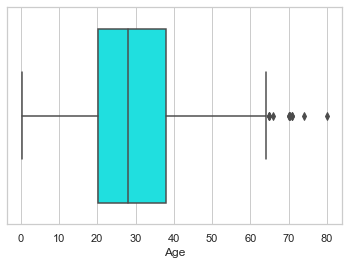

In [6]:
sns.set_theme(style = "whitegrid")

sns.boxplot(x = df['Age'], color = 'cyan')

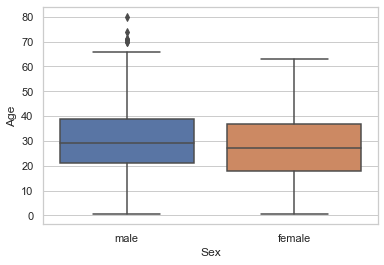

In [7]:
a = sns.boxplot(x = "Sex", y = "Age", data = df)

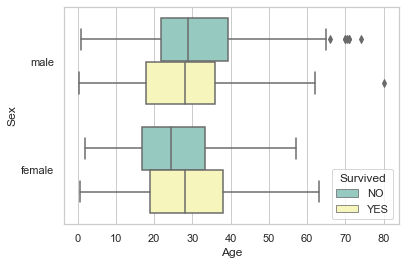

In [8]:
b = sns.boxplot(x = "Age", y = "Sex", hue = "Survived",
                 data = df, palette = "Set3")

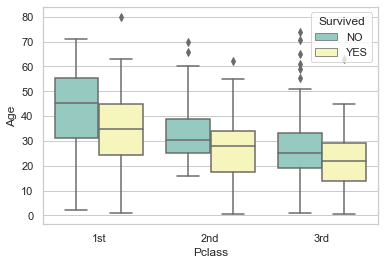

In [9]:
c = sns.boxplot(x = "Pclass", y = "Age", hue = "Survived", order = ['1st','2nd','3rd'],
                 data = df, palette = "Set3")

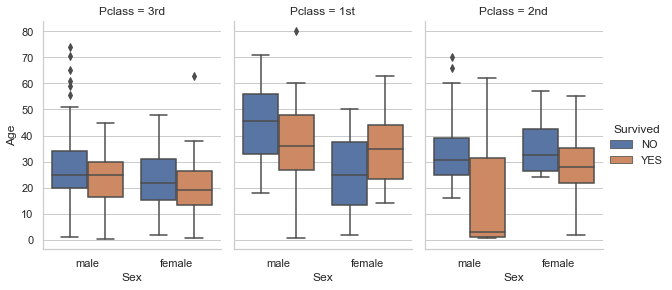

In [10]:
d = sns.catplot(x = "Sex", y = "Age",
                hue = "Survived", col = "Pclass",
                data = df, kind = "box",
                height = 4, aspect = .7);

## Using matplotlib to plot those who surived in 1st, 2nd, & 3rd class

<AxesSubplot:xlabel='Survived'>

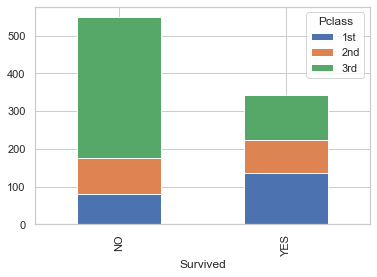

In [11]:
import matplotlib as plt

df.groupby(['Survived','Pclass']).size().unstack().plot(kind = 'bar',stacked = True)

**Using Pair plot**

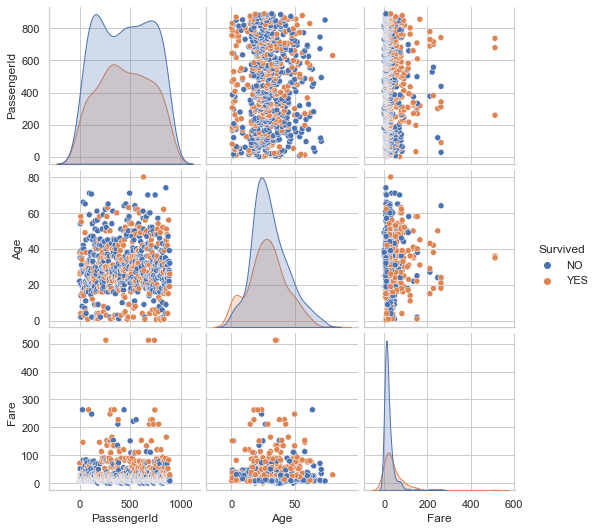

In [12]:
sns.pairplot(df, hue = "Survived")

### Use a heat map to find corelation amongst the features
Essential Key Step #7

<AxesSubplot:>

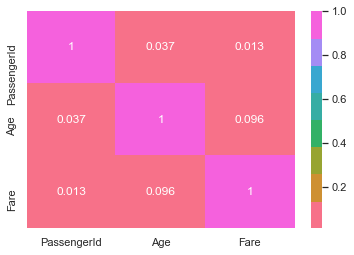

In [13]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.color_palette("husl", 8))

### Use a scatter plot to show the relationship between two variables
Essential Key Step #8 

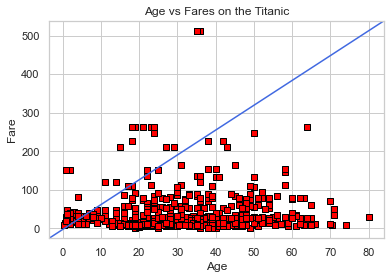

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.lines as mlines

fig, ax = plt.subplots()

x = np.array(df['Age'])
y = np.array(df['Fare'])

plt.scatter(x, y, color = 'red', edgecolor = 'black', marker = 's')

line = mlines.Line2D([0, 1], [0, 1], color = 'royalblue')
plt.title("Age vs Fares on the Titanic")
plt.xlabel("Age")
plt.ylabel("Fare")

transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.show()

## Using NumPy to find the max, mean, & median fare prices paid for 1st, 2nd, & 3rd class seating

Essential Key Step #15

**INFLATION: $1 USD back in 1912 is the equivalent to $28.28 today!**

In [15]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1st    84.154687
2nd    20.662183
3rd    13.675550
Name: Fare, dtype: float64

In [16]:
df.groupby('Pclass')['Fare'].median()

Pclass
1st    60.2875
2nd    14.2500
3rd     8.0500
Name: Fare, dtype: float64

In [17]:
df.groupby('Pclass')['Fare'].max()

Pclass
1st    512.3292
2nd     73.5000
3rd     69.5500
Name: Fare, dtype: float64

**The most expensive ticket in 1st class was $512.32.....which is $14,488.40 today!**  

**The most expensive ticket in 2nd class was $73.50.....which is $2,078.58 today!**  

**The most expensive ticket in 3rd class was $69.55.....which is $1,965.46 today!**

### Integration of SQL & Python 
Essential Key Step #1 (Continued)

In [18]:
import sqlite3

df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,NO,3rd,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S
1,2,YES,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,YES,3rd,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S
3,4,YES,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,NO,3rd,"Allen, Mr. William Henry",male,35.0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,887,NO,2nd,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S
887,888,YES,1st,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S
888,889,NO,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S
889,890,YES,1st,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C


**To use the module, you must first create a Connection object that represents the database. Here the data will be stored in the test_database.db file:**

In [19]:
conn = sqlite3.connect('test_database.db')

In [20]:
c = conn.cursor()

#Create a new dataframe with columns PassengerID, Name, Age, Sex, Survived
new_df = df[['PassengerId','Name','Age','Sex', 'Survived']].copy()

new_df

,PassengerId,Name,Age,Sex,Survived
0,1,"Braund, Mr. Owen Harris",22.0,male,NO
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,YES
2,3,"Heikkinen, Miss. Laina",26.0,female,YES
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,YES
4,5,"Allen, Mr. William Henry",35.0,male,NO
...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,male,NO
887,888,"Graham, Miss. Margaret Edith",19.0,female,YES
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female,NO
889,890,"Behr, Mr. Karl Howell",26.0,male,YES


**Create the table passenger_details with passenger_id, passenger_name, age, sex, survived**

In [21]:
c.execute('CREATE TABLE IF NOT EXISTS passenger_details(passenger_id number, passenger_name text, age number, sex text, survived text)')
conn.commit()

new_df.to_sql('passenger_details', conn, if_exists = 'replace', index = False)

c.execute('''
Select * from passenger_details
''')

for row in c.fetchall():
    print(row)

(1, 'Braund, Mr. Owen Harris', 22.0, 'male', 'NO')
(2, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 38.0, 'female', 'YES')
(3, 'Heikkinen, Miss. Laina', 26.0, 'female', 'YES')
(4, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 35.0, 'female', 'YES')
(5, 'Allen, Mr. William Henry', 35.0, 'male', 'NO')
(6, 'Moran, Mr. James', None, 'male', 'NO')
(7, 'McCarthy, Mr. Timothy J', 54.0, 'male', 'NO')
(8, 'Palsson, Master. Gosta Leonard', 2.0, 'male', 'NO')
(9, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 27.0, 'female', 'YES')
(10, 'Nasser, Mrs. Nicholas (Adele Achem)', 14.0, 'female', 'YES')
(11, 'Sandstrom, Miss. Marguerite Rut', 4.0, 'female', 'YES')
(12, 'Bonnell, Miss. Elizabeth', 58.0, 'female', 'YES')
(13, 'Saundercock, Mr. William Henry', 20.0, 'male', 'NO')
(14, 'Andersson, Mr. Anders Johan', 39.0, 'male', 'NO')
(15, 'Vestrom, Miss. Hulda Amanda Adolfina', 14.0, 'female', 'NO')
(16, 'Hewlett, Mrs. (Mary D Kingcome) ', 55.0, 'female', 'YES')
(17, 'Rice, Master. Euge

### Using conditions to separate the data, slicing data from a particular column value, representing data in matrix form, upload data to NumPy, select a slice or part of the data and display, & merging two dataframes,
Essential Key Steps #14, 10, 11, 12, 13, & 9

In [22]:
c.execute('Drop table young_ones')

**Create table young_ones. Will use a condition WHERE (age <=21) to insert particular data into young_ones table.**

In [23]:
c.execute('''
Create table young_ones(
passenger_id number,
passenger_name text,
age number,
sex text,
survived text)
''')
conn.commit()

In [24]:
c.execute('''
INSERT INTO young_ones
(passenger_id,passenger_name,age,sex,survived)
SELECT passengerid,name, age, sex,survived
FROM passenger_details
WHERE (age <= 21)
AND survived='YES'
''')
conn.commit()

In [25]:
c.execute('''select * from young_ones''')

for row in c.fetchall():
    print(row)

(10, 'Nasser, Mrs. Nicholas (Adele Achem)', 14, 'female', 'YES')
(11, 'Sandstrom, Miss. Marguerite Rut', 4, 'female', 'YES')
(23, 'McGowan, Miss. Anna "Annie"', 15, 'female', 'YES')
(40, 'Nicola-Yarred, Miss. Jamila', 14, 'female', 'YES')
(44, 'Laroche, Miss. Simonne Marie Anne Andree', 3, 'female', 'YES')
(45, 'Devaney, Miss. Margaret Delia', 19, 'female', 'YES')
(57, 'Rugg, Miss. Emily', 21, 'female', 'YES')
(59, 'West, Miss. Constance Mirium', 5, 'female', 'YES')
(69, 'Andersson, Miss. Erna Alexandra', 17, 'female', 'YES')
(79, 'Caldwell, Master. Alden Gates', 0.83, 'male', 'YES')
(85, 'Ilett, Miss. Bertha', 17, 'female', 'YES')
(107, 'Salkjelsvik, Miss. Anna Kristine', 21, 'female', 'YES')
(126, 'Nicola-Yarred, Master. Elias', 12, 'male', 'YES')
(137, 'Newsom, Miss. Helen Monypeny', 19, 'female', 'YES')
(157, 'Gilnagh, Miss. Katherine "Katie"', 16, 'female', 'YES')
(166, 'Goldsmith, Master. Frank John William "Frankie"', 9, 'male', 'YES')
(173, 'Johnson, Miss. Eleanor Ileen', 1, 'f

## Using NumPy to turn our dataset into a matrix

In [26]:
import numpy as np

np_df = new_df.to_numpy()
type(np_df)

numpy.ndarray

In [27]:
#slice the data to show the first 10 rows of the array, with 6 indexes of the array
sliced_data = np_df[:10,:5]
print(sliced_data)

[[1 'Braund, Mr. Owen Harris' 22.0 'male' 'NO']
 [2 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 38.0 'female'
  'YES']
 [3 'Heikkinen, Miss. Laina' 26.0 'female' 'YES']
 [4 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 35.0 'female' 'YES']
 [5 'Allen, Mr. William Henry' 35.0 'male' 'NO']
 [6 'Moran, Mr. James' nan 'male' 'NO']
 [7 'McCarthy, Mr. Timothy J' 54.0 'male' 'NO']
 [8 'Palsson, Master. Gosta Leonard' 2.0 'male' 'NO']
 [9 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)' 27.0 'female'
  'YES']
 [10 'Nasser, Mrs. Nicholas (Adele Achem)' 14.0 'female' 'YES']]


In [28]:
#turn our dataframe into a matrix
new_mat = np.asmatrix(np_df)

In [29]:
new_mat

matrix([[1, 'Braund, Mr. Owen Harris', 22.0, 'male', 'NO'],
        [2, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 38.0,
         'female', 'YES'],
        [3, 'Heikkinen, Miss. Laina', 26.0, 'female', 'YES'],
        ...,
        [889, 'Johnston, Miss. Catherine Helen "Carrie"', nan, 'female',
         'NO'],
        [890, 'Behr, Mr. Karl Howell', 26.0, 'male', 'YES'],
        [891, 'Dooley, Mr. Patrick', 32.0, 'male', 'NO']], dtype=object)

### Splitting our dataframe by passenger's respective title, first name, & last name

In [30]:
len(new_df)

891

In [31]:
fname = []
lname = []
n_title = []
name_list = {'title':n_title, 'firstname':fname, 'lastname':lname}

In [32]:
for i in range(len(new_df)):
    name_col = new_df.iloc[i,1]
    lname.append(name_col.split(",",1)[0])
    pre_title_firstname = name_col.split(",",1)[1]
    n_title.append(pre_title_firstname.split(".")[0][1:])
    fname.append(pre_title_firstname.split(".")[1][1:])

name_list 

{'title': ['Mr',
  'Mrs',
  'Miss',
  'Mrs',
  'Mr',
  'Mr',
  'Mr',
  'Master',
  'Mrs',
  'Mrs',
  'Miss',
  'Miss',
  'Mr',
  'Mr',
  'Miss',
  'Mrs',
  'Master',
  'Mr',
  'Mrs',
  'Mrs',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Miss',
  'Mrs',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Don',
  'Mrs',
  'Miss',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Miss',
  'Miss',
  'Mrs',
  'Mrs',
  'Mr',
  'Miss',
  'Miss',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Mrs',
  'Master',
  'Mr',
  'Mrs',
  'Mrs',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Miss',
  'Master',
  'Mr',
  'Miss',
  'Mr',
  'Master',
  'Mr',
  'Master',
  'Mrs',
  'Mr',
  'Miss',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Master',
  'Miss',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Miss',
  'Mrs',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mrs',
  'Mr',
  'Miss',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Mr',
  'Miss',
  'Mr',
  'Miss

**Putting split matrix into a dataframe**

In [33]:
new_name_df = pd.DataFrame(name_list)

new_name_df

,title,firstname,lastname
0,Mr,Owen Harris,Braund
1,Mrs,John Bradley (Florence Briggs Thayer),Cumings
2,Miss,Laina,Heikkinen
3,Mrs,Jacques Heath (Lily May Peel),Futrelle
4,Mr,William Henry,Allen
...,...,...,...
886,Rev,Juozas,Montvila
887,Miss,Margaret Edith,Graham
888,Miss,"Catherine Helen ""Carrie""",Johnston
889,Mr,Karl Howell,Behr


In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,NO,3rd,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S
1,2,YES,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,YES,3rd,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S
3,4,YES,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,NO,3rd,"Allen, Mr. William Henry",male,35.0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,887,NO,2nd,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S
887,888,YES,1st,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S
888,889,NO,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S
889,890,YES,1st,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C


### Merging two dataframes: Taking the original dataset and inserting title, first name, and last name

In [35]:
title_series = new_name_df["title"]
firstname_series = new_name_df["firstname"]
lastname_series = new_name_df["lastname"]


df_disect = df.drop(['Name'], axis=1)
df_disect.insert(3,"title", title_series)
df_disect.insert(4,"firstname", firstname_series)
df_disect.insert(5,"lastname", lastname_series)
df_disect

,PassengerId,Survived,Pclass,title,firstname,lastname,Sex,Age,Fare,Cabin,Embarked
0,1,NO,3rd,Mr,Owen Harris,Braund,male,22.0,7.2500,0,S
1,2,YES,1st,Mrs,John Bradley (Florence Briggs Thayer),Cumings,female,38.0,71.2833,C85,C
2,3,YES,3rd,Miss,Laina,Heikkinen,female,26.0,7.9250,0,S
3,4,YES,1st,Mrs,Jacques Heath (Lily May Peel),Futrelle,female,35.0,53.1000,C123,S
4,5,NO,3rd,Mr,William Henry,Allen,male,35.0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,NO,2nd,Rev,Juozas,Montvila,male,27.0,13.0000,0,S
887,888,YES,1st,Miss,Margaret Edith,Graham,female,19.0,30.0000,B42,S
888,889,NO,3rd,Miss,"Catherine Helen ""Carrie""",Johnston,female,NaN,23.4500,0,S
889,890,YES,1st,Mr,Karl Howell,Behr,male,26.0,30.0000,C148,C


### Create a class, function, try, & except

**Using args, create a function that will show the passengers of a certain age, depending on the input parameter.**  

Essential Key Steps #19-20

In [36]:
%%writefile module_new.py
import sys
import pandas as pd

class mathStats:
    def percentCal(*args): #valueX = age , dataframe = dataset dataframe
        try:
            valueX = args[0]
            dataframe = args[1]
            if float(valueX).is_integer():
                if isinstance(dataframe,pd.DataFrame):
                    display(dataframe.loc[(dataframe['Age'] <= valueX)])
                else:
                    raise ValueError("this is not a dataframe")
                    
            else:
                raise ValueError("Please Enter a number")
            
        except ValueError as e:
            print(e)

Overwriting module_new.py


In [37]:
import module_new as ms

ms.mathStats.percentCal(7, df_disect)

,PassengerId,Survived,Pclass,title,firstname,lastname,Sex,Age,Fare,Cabin,Embarked
7,8,NO,3rd,Master,Gosta Leonard,Palsson,male,2.00,21.0750,0,S
10,11,YES,3rd,Miss,Marguerite Rut,Sandstrom,female,4.00,16.7000,G6,S
16,17,NO,3rd,Master,Eugene,Rice,male,2.00,29.1250,0,Q
43,44,YES,2nd,Miss,Simonne Marie Anne Andree,Laroche,female,3.00,41.5792,0,C
50,51,NO,3rd,Master,Juha Niilo,Panula,male,7.00,39.6875,0,S
58,59,YES,2nd,Miss,Constance Mirium,West,female,5.00,27.7500,0,S
63,64,NO,3rd,Master,Harald,Skoog,male,4.00,27.9000,0,S
78,79,YES,2nd,Master,Alden Gates,Caldwell,male,0.83,29.0000,0,S
119,120,NO,3rd,Miss,Ellis Anna Maria,Andersson,female,2.00,31.2750,0,S
164,165,NO,3rd,Master,Eino Viljami,Panula,male,1.00,39.6875,0,S


**Find the percentage of those who survived**

In [38]:
df_survived = df.loc[(df['Survived']=='YES')&(df['Age']>=20)] #survived with age greater than 20
display(df_survived)
df_sur =df_survived['Survived'].size
df_unlucky = df.loc[(df['Age']>=20)]
display(df_unlucky)
df_tot = df_unlucky['Survived'].size 

df_not = df_tot-df_sur
print('The total amount of survivers were:', df_not)
percent = df_sur/df_tot
print('The percentage of those who survived from the entire ship:', percent)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
1,2,YES,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,YES,3rd,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S
3,4,YES,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
8,9,YES,3rd,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,0,S
11,12,YES,1st,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,872,YES,1st,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,52.5542,D35,S
874,875,YES,2nd,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,24.0000,0,C
879,880,YES,1st,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,83.1583,C50,C
880,881,YES,2nd,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,26.0000,0,S


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,NO,3rd,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S
1,2,YES,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,YES,3rd,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S
3,4,YES,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,NO,3rd,"Allen, Mr. William Henry",male,35.0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
884,885,NO,3rd,"Sutehall, Mr. Henry Jr",male,25.0,7.0500,0,S
885,886,NO,3rd,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,0,Q
886,887,NO,2nd,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S
889,890,YES,1st,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C


The total amount of survivers were: 339
The percentage of those who survived from the entire ship: 0.3836363636363636
